## Import libraries:

In [2]:
from imports import *

# Individual coordinate reconstruction (t,x,y,z)

## Training and test separation

In [3]:
table = pq.read_table('saved_archives/ophit_variables.parquet')
hit_nuvT_f = ak.from_iter(table.column('hit_nuvT_f').to_pylist())

In [22]:
x_train_realistic_visvuv, x_test_realistic_visvuv, train_nuvT_realistic_visvuv, test_nuvT_realistic_visvuv = split_train_test("/data/vidales/images/image_realistic_visvuv.npy", hit_nuvT_f, test_ratio=0.30)
x_train_compressed_visvuv, x_test_compressed_visvuv, train_nuvT_compressed_visvuv, test_nuvT_compressed_visvuv= split_train_test("/data/vidales/images/image_compressed_visvuv.npy", hit_nuvT_f, test_ratio=0.30)

Test size: 4340
x_train shape: (10128, 59, 70, 8), x_test shape: (4340, 59, 70, 8)
train_nuvT length: 10128, test_nuvT length: 4340
Test size: 4340
x_train shape: (10128, 9, 36, 8), x_test shape: (4340, 9, 36, 8)
train_nuvT length: 10128, test_nuvT length: 4340


In [23]:
def create_cnn_model(x_train):

    from tensorflow.keras import layers, models
    from tensorflow.keras.callbacks import ModelCheckpoint
    """
    Creates a CNN model based on the provided architecture.
    
    Parameters:
    - input_shape: tuple, the shape of the input data (excluding batch size).
    
    Returns:
    - model: A compiled CNN model.
    """
    # Input layer
    input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
    input_layer = layers.Input(shape=input_shape)
    
    # First convolutional block
    model = layers.BatchNormalization()(input_layer)
    model = layers.Conv2D(128, (3, 3), padding='same')(model)
    model = layers.LeakyReLU(alpha=0.1)(model)
    model = layers.MaxPooling2D((2, 2), padding='same')(model)
    
    # Second convolutional block
    model = layers.Conv2D(256, (3, 3), padding='same')(model)
    model = layers.LeakyReLU(alpha=0.1)(model)
    model = layers.MaxPooling2D((2, 2), padding='same')(model)
    
    # Third convolutional block
    model = layers.Conv2D(512, (3, 3), padding='same')(model)
    model = layers.LeakyReLU(alpha=0.1)(model)
    model = layers.MaxPooling2D((2, 2), padding='same')(model)
    
    # Flatten the output and pass through dense layers
    model = layers.Flatten()(model)
    model = layers.Dropout(0.2)(model)
    model = layers.Dense(512, activation='relu')(model)
    model = layers.Dense(128, activation='relu')(model)
    
    # Output layer
    output_layer = layers.Dense(1, activation='linear')(model)
    
    # Create the model
    model_def = models.Model(inputs=input_layer, outputs=output_layer)
    
    # Compile the model
    model_def.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return model_def

In [27]:
model_realistic_visvuv = create_cnn_model(x_train_realistic_visvuv)
model_compressed_visvuv = create_cnn_model(x_train_compressed_visvuv)
#model_realistic_visvuv.summary()

In [25]:
nuvT_pred_realistic_visvuv, history_t_realistic_visvuv = train_and_predict(model_realistic_visvuv, x_train_realistic_visvuv, train_nuvT_realistic_visvuv, x_test_realistic_visvuv, test_nuvT_realistic_visvuv, epochs=30, batch_size=32)

2024-10-23 19:08:47.567230: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1338516480 exceeds 10% of free system memory.
2024-10-23 19:08:48.621163: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1338516480 exceeds 10% of free system memory.


Epoch 1/30
317/317 - 13s - loss: 127105.1016 - mse: 127105.1016 - val_loss: 639789.6875 - val_mse: 639789.6875 - 13s/epoch - 40ms/step
Epoch 2/30
317/317 - 8s - loss: 50570.1914 - mse: 50570.1914 - val_loss: 397457.0000 - val_mse: 397457.0000 - 8s/epoch - 24ms/step
Epoch 3/30
317/317 - 7s - loss: 49395.7344 - mse: 49395.7344 - val_loss: 102250.0938 - val_mse: 102250.0938 - 7s/epoch - 22ms/step
Epoch 4/30
317/317 - 7s - loss: 41070.2617 - mse: 41070.2617 - val_loss: 26594.9922 - val_mse: 26594.9922 - 7s/epoch - 22ms/step
Epoch 5/30
317/317 - 7s - loss: 32493.9375 - mse: 32493.9375 - val_loss: 32589.7188 - val_mse: 32589.7188 - 7s/epoch - 23ms/step
Epoch 6/30
317/317 - 7s - loss: 26250.9453 - mse: 26250.9453 - val_loss: 22435.8438 - val_mse: 22435.8438 - 7s/epoch - 22ms/step
Epoch 7/30
317/317 - 7s - loss: 21822.1992 - mse: 21822.1992 - val_loss: 15854.7100 - val_mse: 15854.7100 - 7s/epoch - 22ms/step
Epoch 8/30
317/317 - 7s - loss: 20448.5410 - mse: 20448.5410 - val_loss: 17347.0176 - v

In [28]:
nuvT_pred_compressed_visvuv, history_t_compressed_visvuv = train_and_predict(model_compressed_visvuv, x_train_compressed_visvuv, train_nuvT_compressed_visvuv, x_test_compressed_visvuv, test_nuvT_compressed_visvuv, epochs=30, batch_size=32)

Epoch 1/30
317/317 - 3s - loss: 127869.7656 - mse: 127869.7656 - val_loss: 860725.5625 - val_mse: 860725.5625 - 3s/epoch - 10ms/step
Epoch 2/30
317/317 - 2s - loss: 71200.7734 - mse: 71200.7734 - val_loss: 79388.7578 - val_mse: 79388.7578 - 2s/epoch - 6ms/step
Epoch 3/30
317/317 - 2s - loss: 57775.5469 - mse: 57775.5469 - val_loss: 37114.8555 - val_mse: 37114.8555 - 2s/epoch - 6ms/step
Epoch 4/30
317/317 - 2s - loss: 57291.5312 - mse: 57291.5312 - val_loss: 29450.9316 - val_mse: 29450.9316 - 2s/epoch - 6ms/step
Epoch 5/30
317/317 - 2s - loss: 47602.8750 - mse: 47602.8750 - val_loss: 86537.2891 - val_mse: 86537.2891 - 2s/epoch - 6ms/step
Epoch 6/30
317/317 - 2s - loss: 43653.3828 - mse: 43653.3828 - val_loss: 30744.9121 - val_mse: 30744.9121 - 2s/epoch - 6ms/step
Epoch 7/30
317/317 - 2s - loss: 39806.7930 - mse: 39806.7930 - val_loss: 21905.7207 - val_mse: 21905.7207 - 2s/epoch - 6ms/step
Epoch 8/30
317/317 - 2s - loss: 37554.4492 - mse: 37554.4492 - val_loss: 29557.3574 - val_mse: 2955

# Visualización de resultados

MSE computed:

In [8]:
testScoreMSE_nuvT = mean_squared_error(test_nuvT, nuvT_pred_realistic)
print('MSE_nuvT: %.4f' % np.sqrt((testScoreMSE_nuvT)))

RECM_nuvT: 117.7696


The next plot visualizes the evolution of loss over epochs for the training and test set.

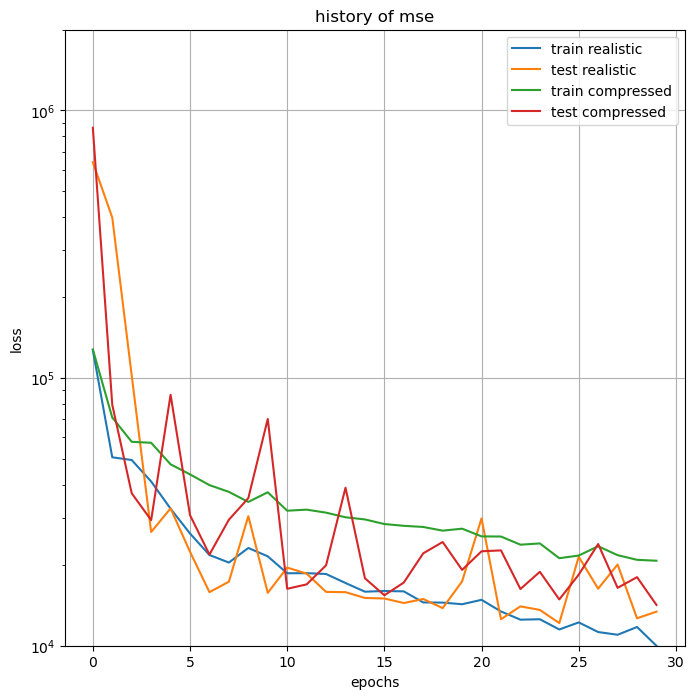

In [29]:
plt.figure(1, figsize=(8,8))
plt.plot(history_t_realistic_visvuv.history['mse'])
plt.plot(history_t_realistic_visvuv.history['val_mse'])
plt.plot(history_t_compressed_visvuv.history['mse'])
plt.plot(history_t_compressed_visvuv.history['val_mse'])

plt.yscale("log")
plt.title('history of mse')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()
plt.legend(['train realistic', 'test realistic', 'train compressed', 'test compressed'], loc='upper right')
plt.ylim(10**4,2*10**6)
plt.show()

The next plot shows the predicted over real data, it shows the error distribution.

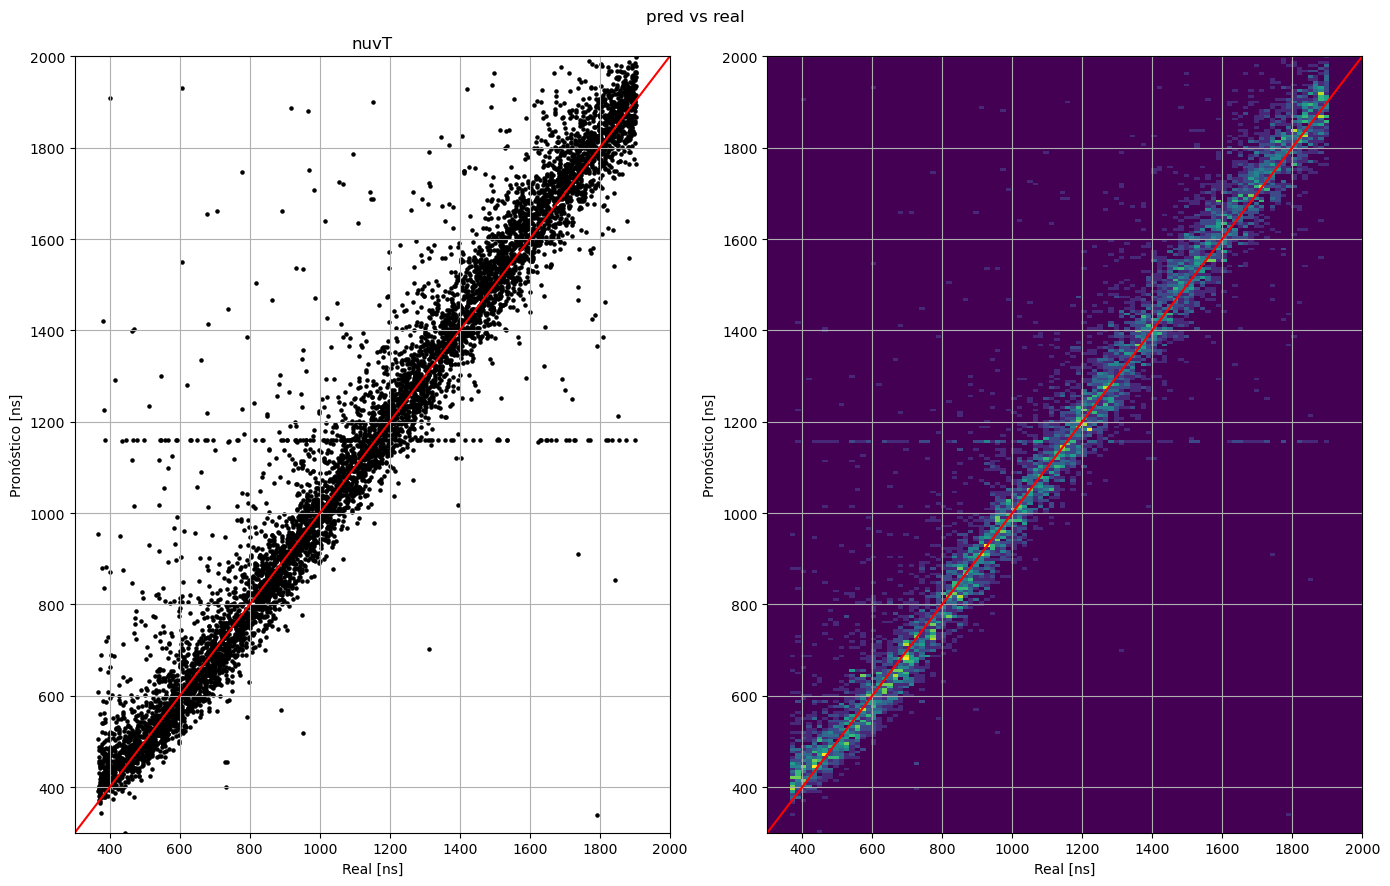

In [41]:
fig, axs = plt.subplots(1,2,figsize=(14,9))
fig.suptitle("pred vs real")
axs[0].scatter(test_nuvT, nuvT_pred_realistic, color="black",s=5)
axs[0].grid()

axs[0].plot([300,2000],[300,2000],color="r")
axs[0].title.set_text('nuvT')
axs[0].set_xlim([300,2000])
axs[0].set_ylim([300,2000])
axs[0].set_ylabel('Predicted [ns]')
axs[0].set_xlabel('Real [ns]')


im1 = axs[1].hist2d(test_nuvT, nuvT_pred_realistic.flatten(), bins=(100, 300), cmap='viridis',cmax=30)
#fig.colorbar(im1[3], ax=axs[1])
axs[1].grid()

axs[1].plot([300,2000],[300,2000],color="r")
axs[1].set_xlim([300,2000])
axs[1].set_ylim([300,2000])
axs[1].set_ylabel('Predicted [ns]')
axs[1].set_xlabel('Real [ns]')
axs[1].set_facecolor('#440154')

fig.tight_layout()

# plt.savefig('/tmp/CNNx2+4T+N_Recta_I.png', dpi=300)

Finally, Gaussian adjustments are made to the error between prediction and actual data to check the quality of the results.

------------------
Media nuvT = 5.580523491402194
Sigma nuvT = 52.49821478635204
------------------


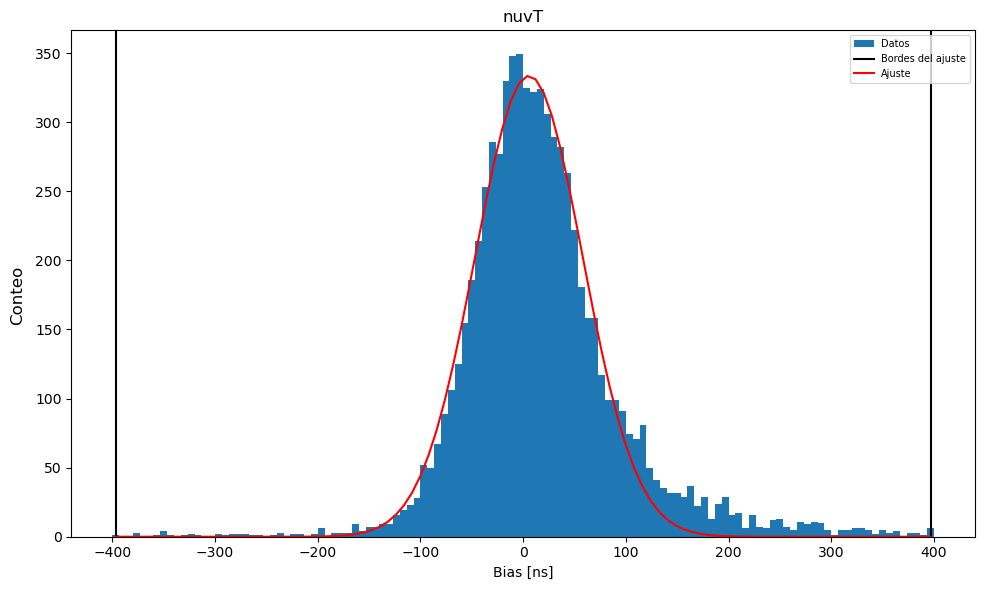

In [16]:
# Gaussian fit of the difference between the prediction and the real value

from scipy.optimize import curve_fit

# Define the Gaussian function
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Variables de los histogramas
diff_nuvT = nuvT_pred_realistic.flatten()-test_nuvT

fig, axs = plt.subplots(figsize=(10,6))

# Valores de X
axs.title.set_text('nuvT')
counts_nuvT, bins_nuvT, patches_nuvT = axs.hist(diff_nuvT,120, range=[-400,400], label='Data')

step_nuvT = (bins_nuvT[1]-bins_nuvT[0])/2
bin_centers_nuvT = bins_nuvT[:-1]+step_nuvT

ini_nuvT = 0
fin_nuvT = 119
axs.axvline(x = bin_centers_nuvT[ini_nuvT], color = 'k', label='Edge"s fit')
axs.axvline(x = bin_centers_nuvT[fin_nuvT], color = 'k')

popt_nuvT, pcov_nuvT = curve_fit(func, bin_centers_nuvT[ini_nuvT:fin_nuvT+1], counts_nuvT[ini_nuvT:fin_nuvT+1])


ym_nuvT = func(np.linspace(bin_centers_nuvT[ini_nuvT], bin_centers_nuvT[fin_nuvT],100), popt_nuvT[0], popt_nuvT[1], popt_nuvT[2])
axs.plot(np.linspace(bin_centers_nuvT[ini_nuvT], bin_centers_nuvT[fin_nuvT],100), ym_nuvT, c='r', label='Fit')
axs.set_xlabel('Bias [ns]')
axs.legend(prop = { "size": 7 })

fig.supylabel('Count')
fig.tight_layout()

# plt.savefig('/tmp/CNNx2+4T+N_Distrib_I.png', dpi=300)

print('------------------')
print('Mean nuvT =',popt_nuvT[1])
print('St. Dev. nuvT =',popt_nuvT[2])
print('------------------')


In [17]:
print('Gauss nuvT')
print(np.std(diff_nuvT))
print(np.mean(diff_nuvT))

Gauss nuvT
115.17707820363492
24.574550175010334


## **Prueba Baricentro energía**

In [2]:
file_path = '/data/vidales/opana_tree_combined_v2609.root'
file = uproot.open(file_path)
optree = file['opanatree']['OpAnaTree'] # Tree con número de fotoelectrones
print("Keys in optree:", optree.keys())

Keys in optree: ['eventID', 'runID', 'subrunID', 'nuvX', 'nuvY', 'nuvZ', 'nuvT', 'nuvE', 'stepX', 'stepY', 'stepZ', 'stepT', 'dE', 'energydep', 'energydepX', 'energydepY', 'energydepZ', 'E', 'StartPx', 'StartPy', 'StartPz', 'EndPx', 'EndPy', 'EndPz', 'process', 'trackID', 'motherID', 'PDGcode', 'InTimeCosmics', 'InTimeCosmicsTime', 'dEtpc', 'dEpromx', 'dEpromy', 'dEpromz', 'dEspreadx', 'dEspready', 'dEspreadz', 'dElowedges', 'dEmaxedges', 'nopflash', 'flash_id', 'flash_time', 'flash_total_pe', 'flash_pe_v', 'flash_tpc', 'flash_y', 'flash_yerr', 'flash_z', 'flash_zerr', 'flash_x', 'flash_xerr', 'flash_ophit_time', 'flash_ophit_risetime', 'flash_ophit_starttime', 'flash_ophit_amp', 'flash_ophit_area', 'flash_ophit_width', 'flash_ophit_pe', 'flash_ophit_ch']


In [6]:
nopflash = optree['nopflash'].array()

In [7]:
print("nopflash:", nopflash)

nopflash: [2, 2, 3, 2, 3, 2, 4, 2, 4, 3, 4, 4, 4, ..., 4, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3]


In [4]:
energydep = optree['energydep'].array()

energydep: 15300


In [5]:
print("energydep:", energydep)

energydep: [[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], []], ...]


In [6]:
# Check if any value in energydep is different from zero
any_non_zero = ak.any(energydep != 0)

# Output the result
if any_non_zero:
    print("There are non-zero values in energydep.")
else:
    print("All values in energydep are zero.")

All values in energydep are zero.


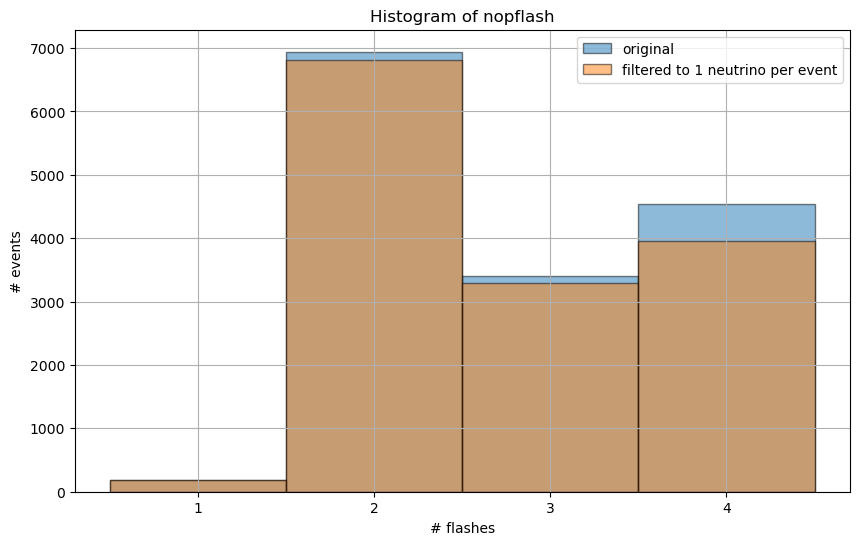

In [11]:
import matplotlib.pyplot as plt


# Plot histogram of filtered_nopflash
plt.figure(figsize=(10, 6))
plt.hist(nopflash, bins=4, edgecolor='black', range=(0.5, 4.5), alpha=0.5)
plt.hist(nopflash_filtered, bins=4, edgecolor='black', range=(0.5, 4.5), alpha=0.5)
plt.title('Histogram of nopflash')
plt.xlabel('# flashes')
plt.ylabel('# events')
plt.legend(['original', 'filtered to 1 neutrino per event'])
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()